## Problem1

### (a)

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('constituents.csv')
data
print("Shape of data: ", data.shape)
symbol_list = data.Symbol.tolist()

Shape of data:  (505, 3)


In [ ]:
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

start_date = '2012-06-11'
end_date = '2022-06-09'
df = web.get_data_yahoo(symbol_list, start=start_date, end = end_date)

[*********************100%***********************]  505 of 505 completed

14 Failed downloads:
- INFO: No data found, symbol may be delisted
- ANTM: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- WLTW: No data found, symbol may be delisted
- CERN: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- PBCT: No data found, symbol may be delisted
- DISCK: No data found, symbol may be delisted
- VIAC: No data found, symbol may be delisted
- FB: No data found, symbol may be delisted
- XLNX: No data found, symbol may be delisted
- BLL: No data found, symbol may be delisted
- KSU: No data found, symbol may be delisted
[*********************100%***********************]  506 of 505 completed

In [ ]:
adj_close_data = df['Adj Close']
print("Shape of Data: ", adj_close_data.shape)

Shape of Data:  (2516, 505)


In [ ]:
limit = 0.05
drop_list = []
for column in adj_close_data.columns:
  if adj_close_data[column].isnull().mean() > limit:
    drop_list.append(column)

adj_close_data.drop(drop_list, axis=1, inplace=True)
print(adj_close_data.shape)

(2516, 454)


In [ ]:
adj_close_data.dropna(axis=0, inplace=True)
print(adj_close_data.shape)

(2429, 454)
[***************************126%*****************************]  636 of 505 completed

### (b)

In [ ]:
start = '2012-06-12'
end = '2022-06-09'
df = adj_close_data[(adj_close_data.index >= start) & (adj_close_data.index <= end)]
df = df[['AAPL', 'GOOG', 'TSLA']]

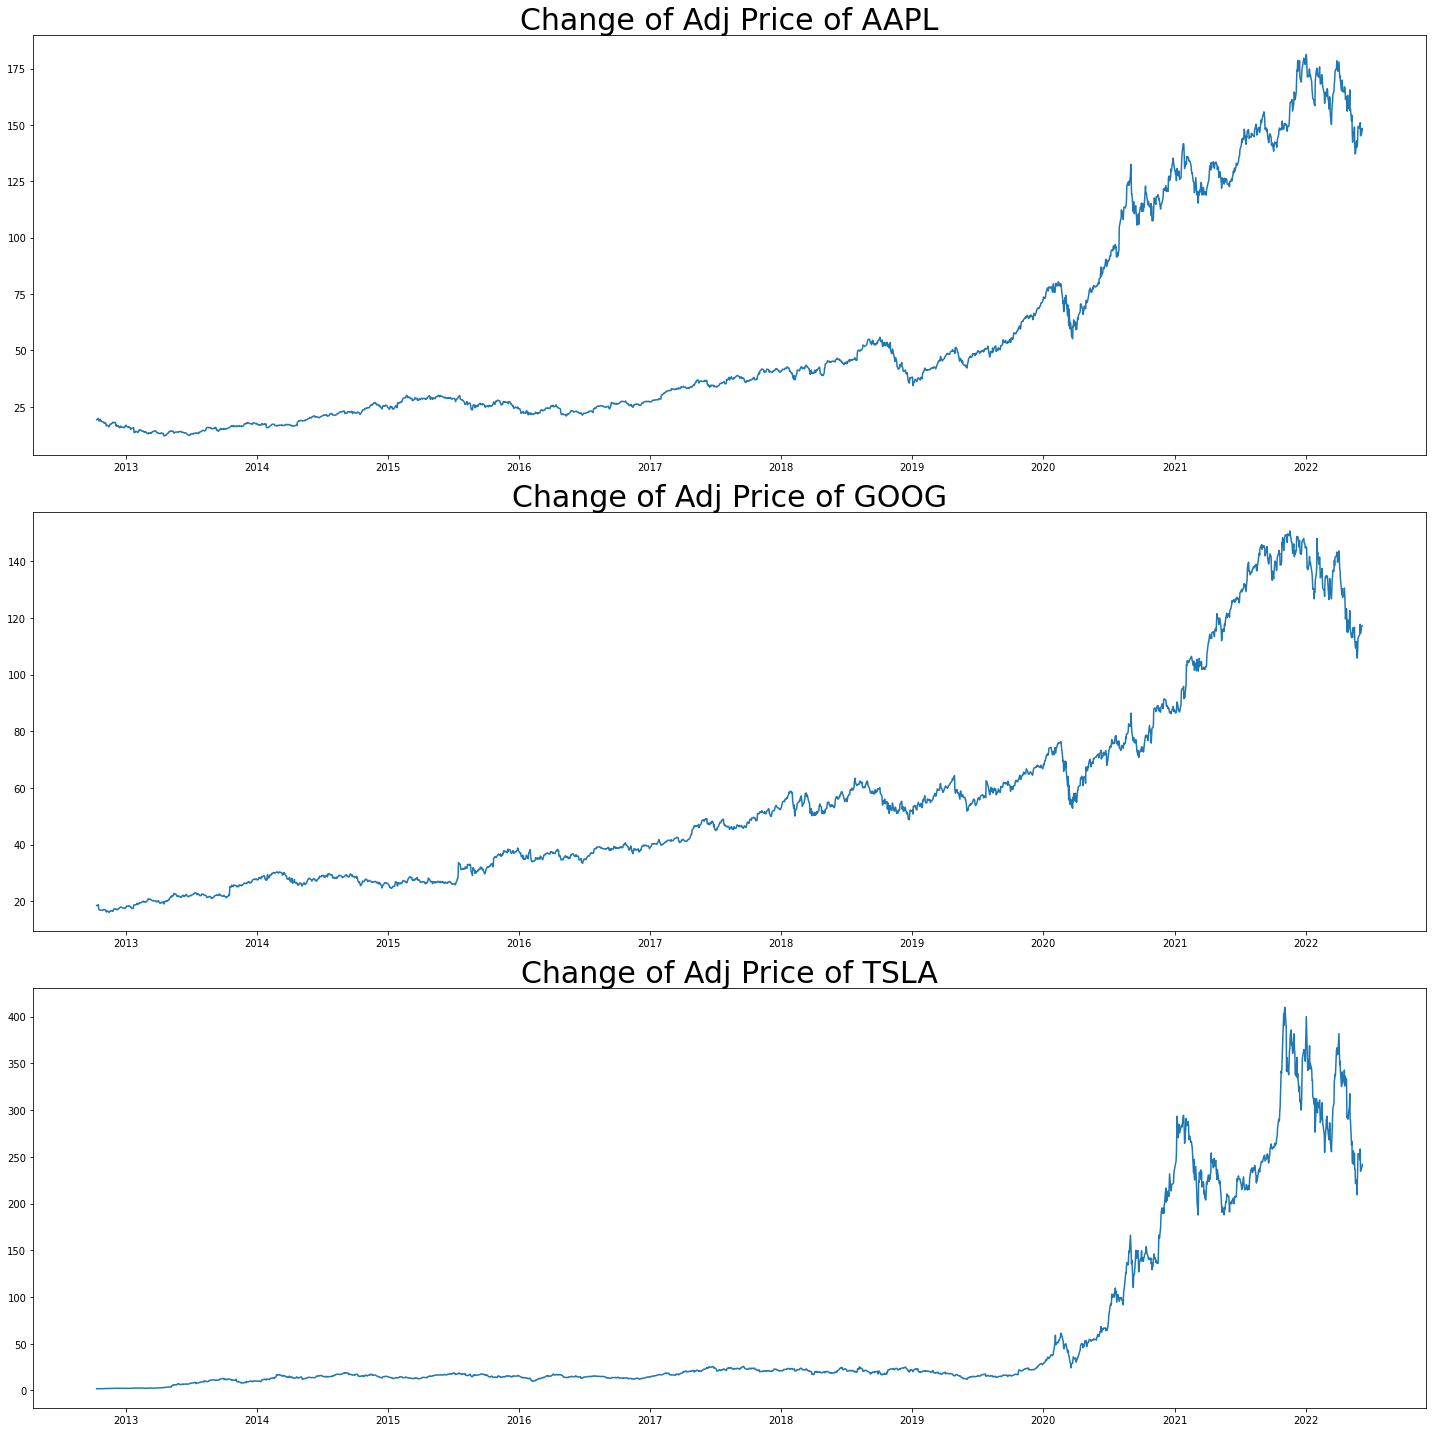

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,1, figsize=(20,20))

for i, column in enumerate(df.columns):
  axes[i].plot(df[column])
  axes[i].set_title(f'Change of Adj Price of {column}', fontsize=30)

plt.tight_layout()
plt.show()

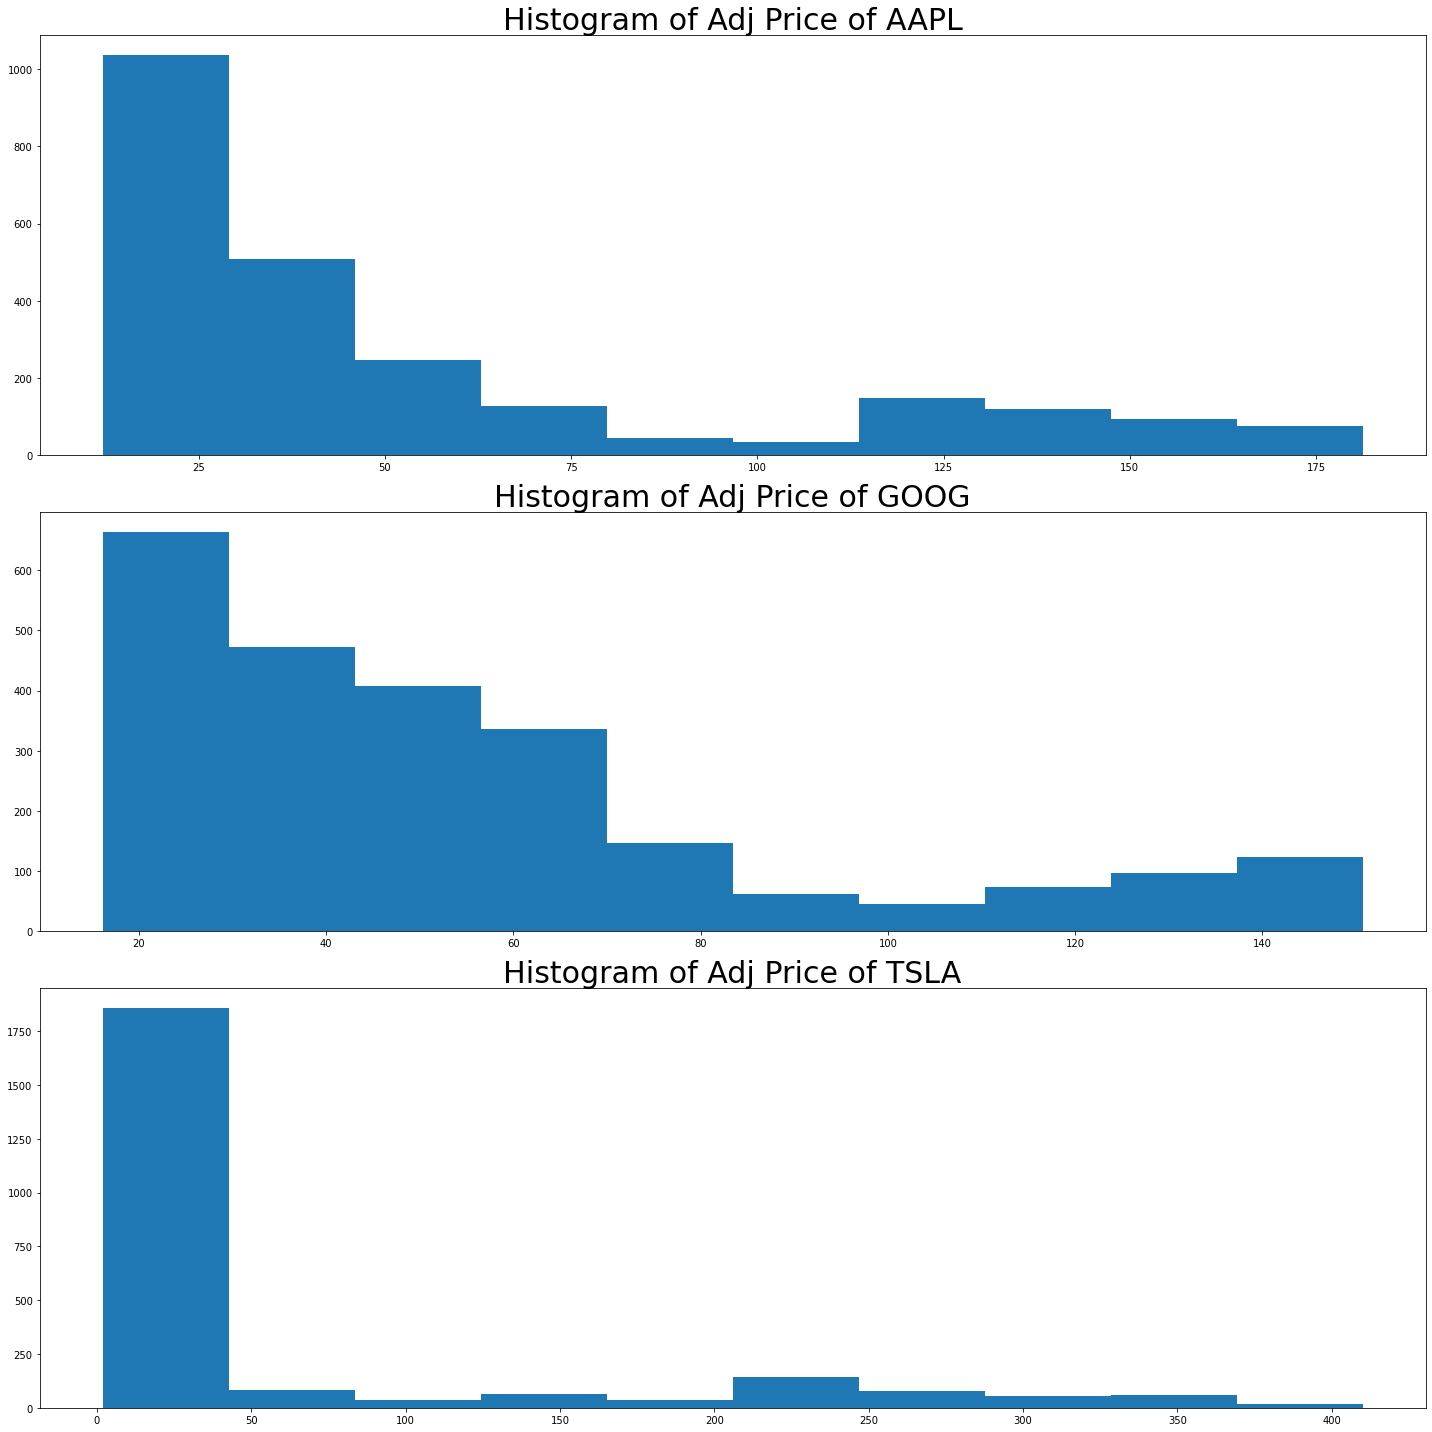

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,1, figsize=(20,20))

for i, column in enumerate(df.columns):
  axes[i].hist(df[column])
  axes[i].set_title(f'Histogram of Adj Price of {column}', fontsize=30)

plt.tight_layout()
plt.show()